<center><h1><strong>DATA ANALySIS</strong></h1></center>


* __authors__ = [@g30v4](https://github.com/g30v4)
* __date__ = "14/12/2022"
* __version__ = "1.0.0"
* __license__ = "GPL"
* __title__ = "Interpretacion, comprension  y modelamiento de la data"
* __keywords__ = "Machine Learning, K-Means, World Cup, Soccer, Data Analysis"

# 1. Pre Requisitos

In [1]:
# Instalación de las librerias o dependencias necesarias
!pip install pandas seaborn matplotlib scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Para graficación
from sklearn.cluster import KMeans # Para el modelamiento

# 2. Carga de la Data

In [3]:
# Ubicacion del archivo de datos
url = 'felicidadMundial.csv' # external url?

In [4]:
# Se carga el archvio csv con pandas DataFrame
data = pd.read_csv(url) # Recupera los datos en formato csv a tipo dataframe (Estructura de datos bidimensional)
data.head() # Visualiza los 5 primeros datos del dataframe

,Unnamed: 0,N.º,País,Puntuación,PIB per cápita,Apoyo sociales,Esperanza de años de vida saludable,Libertad para tomar decisiones vitales,Generosidad,Percepción de la corrupción
0,0,1,Finlandia,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,1,2,Dinamarca,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,2,3,Islandia,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,3,4,Israel,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,4,5,Países Bajos,7.403,1.942,1.488,0.545,0.672,0.251,0.394


# 3. Inspeccion de la data

In [5]:

# Visualizamos el DataFrame
data

,Unnamed: 0,N.º,País,Puntuación,PIB per cápita,Apoyo sociales,Esperanza de años de vida saludable,Libertad para tomar decisiones vitales,Generosidad,Percepción de la corrupción
0,0,1,Finlandia,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,1,2,Dinamarca,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,2,3,Islandia,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,3,4,Israel,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,4,5,Países Bajos,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...,...
132,132,133,República Democrática del Congo,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,133,134,Zimbabue,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,134,135,Sierra Leona,3.138,0.670,0.540,0.092,0.371,0.193,0.051
135,135,136,Líbano,2.392,1.417,0.476,0.398,0.123,0.061,0.020


In [6]:
# Remove unnecesary cols
# https://www.educative.io/answers/how-to-delete-a-column-in-pandas
# https://sparkbyexamples.com/pandas/pandas-drop-multiple-columns-by-index
# data.drop('a', inplace=True, axis=1)
data = data.drop(data.columns[[0]],axis = 1)
data

,N.º,País,Puntuación,PIB per cápita,Apoyo sociales,Esperanza de años de vida saludable,Libertad para tomar decisiones vitales,Generosidad,Percepción de la corrupción
0,1,Finlandia,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,2,Dinamarca,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,3,Islandia,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,4,Israel,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,5,Países Bajos,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...
132,133,República Democrática del Congo,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,134,Zimbabue,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,135,Sierra Leona,3.138,0.670,0.540,0.092,0.371,0.193,0.051
135,136,Líbano,2.392,1.417,0.476,0.398,0.123,0.061,0.020


In [7]:
# Inspeccionamos el tipo de dato de cada variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   N.º                                     137 non-null    int64  
 1   País                                    137 non-null    object 
 2   Puntuación                              137 non-null    float64
 3   PIB per cápita                          137 non-null    float64
 4   Apoyo sociales                          137 non-null    float64
 5   Esperanza de años de vida saludable     137 non-null    float64
 6   Libertad para tomar decisiones vitales  137 non-null    float64
 7   Generosidad                             137 non-null    float64
 8   Percepción de la corrupción             137 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.8+ KB


In [8]:
# Realizamos una descripción de los estadísticos básicos para comprender la data
data.describe()

,N.º,Puntuación,PIB per cápita,Apoyo sociales,Esperanza de años de vida saludable,Libertad para tomar decisiones vitales,Generosidad,Percepción de la corrupción
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,69.000000,5.539796,1.406985,1.156212,0.365635,0.540000,0.148474,0.145847
std,39.692569,1.139929,0.432963,0.326322,0.156243,0.149501,0.076053,0.126773
min,1.000000,1.859000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,4.724000,1.099000,0.962000,0.250000,0.455000,0.097000,0.060000
50%,69.000000,5.684000,1.449000,1.227000,0.389000,0.557000,0.137000,0.111000
75%,103.000000,6.334000,1.798000,1.401000,0.486000,0.656000,0.199000,0.187000
max,137.000000,7.804000,2.200000,1.620000,0.702000,0.772000,0.422000,0.561000


# 4. Depuración de la data

In [9]:
# Fix no value in Titulos col
def fixTitulos(val):
    return 0 if val == '-' else int(val)

In [10]:
def fixRend(val):
    if (val == '%'):
        return float(val.replace(',', '.').replace('%', ''))
    return val

In [12]:
# Inspeccionamos el tipo de dato de cada variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   N.º                                     137 non-null    int64  
 1   País                                    137 non-null    object 
 2   Puntuación                              137 non-null    float64
 3   PIB per cápita                          137 non-null    float64
 4   Apoyo sociales                          137 non-null    float64
 5   Esperanza de años de vida saludable     137 non-null    float64
 6   Libertad para tomar decisiones vitales  137 non-null    float64
 7   Generosidad                             137 non-null    float64
 8   Percepción de la corrupción             137 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.8+ KB


# 4. Análisis de la Data

In [15]:
data[['País','Puntuación', 'PIB per cápita', 'Apoyo sociales', 'Esperanza de años de vida saludable', 'Libertad para tomar decisiones vitales', 'Generosidad', 'Percepción de la corrupción']].corr().style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-15-48257871fd65>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data[['País','Puntuación', 'PIB per cápita', 'Apoyo sociales', 'Esperanza de años de vida saludable', 'Libertad para tomar decisiones vitales', 'Generosidad', 'Percepción de la corrupción']].corr().style.background_gradient(cmap='coolwarm').set_precision(2)
<ipython-input-15-48257871fd65>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  data[['País','Puntuación', 'PIB per cápita', 'Apoyo sociales', 'Esperanza de años de vida saludable', 'Libertad para tomar decisiones vitales', 'Generosidad', 'Percepción de la corrupción']].corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,Puntuación,PIB per cápita,Apoyo sociales,Esperanza de años de vida saludable,Libertad para tomar decisiones vitales,Generosidad,Percepción de la corrupción
Puntuación,1.00,0.78,0.83,0.75,0.66,0.04,0.47
PIB per cápita,0.78,1.00,0.74,0.84,0.45,-0.16,0.44
Apoyo sociales,0.83,0.74,1.00,0.72,0.54,0.04,0.27
Esperanza de años de vida saludable,0.75,0.84,0.72,1.00,0.42,-0.13,0.41
Libertad para tomar decisiones vitales,0.66,0.45,0.54,0.42,1.00,0.17,0.38
Generosidad,0.04,-0.16,0.04,-0.13,0.17,1.00,0.12
Percepción de la corrupción,0.47,0.44,0.27,0.41,0.38,0.12,1.00


> ## Interpretación de la matriz ?
Realizar estudiante

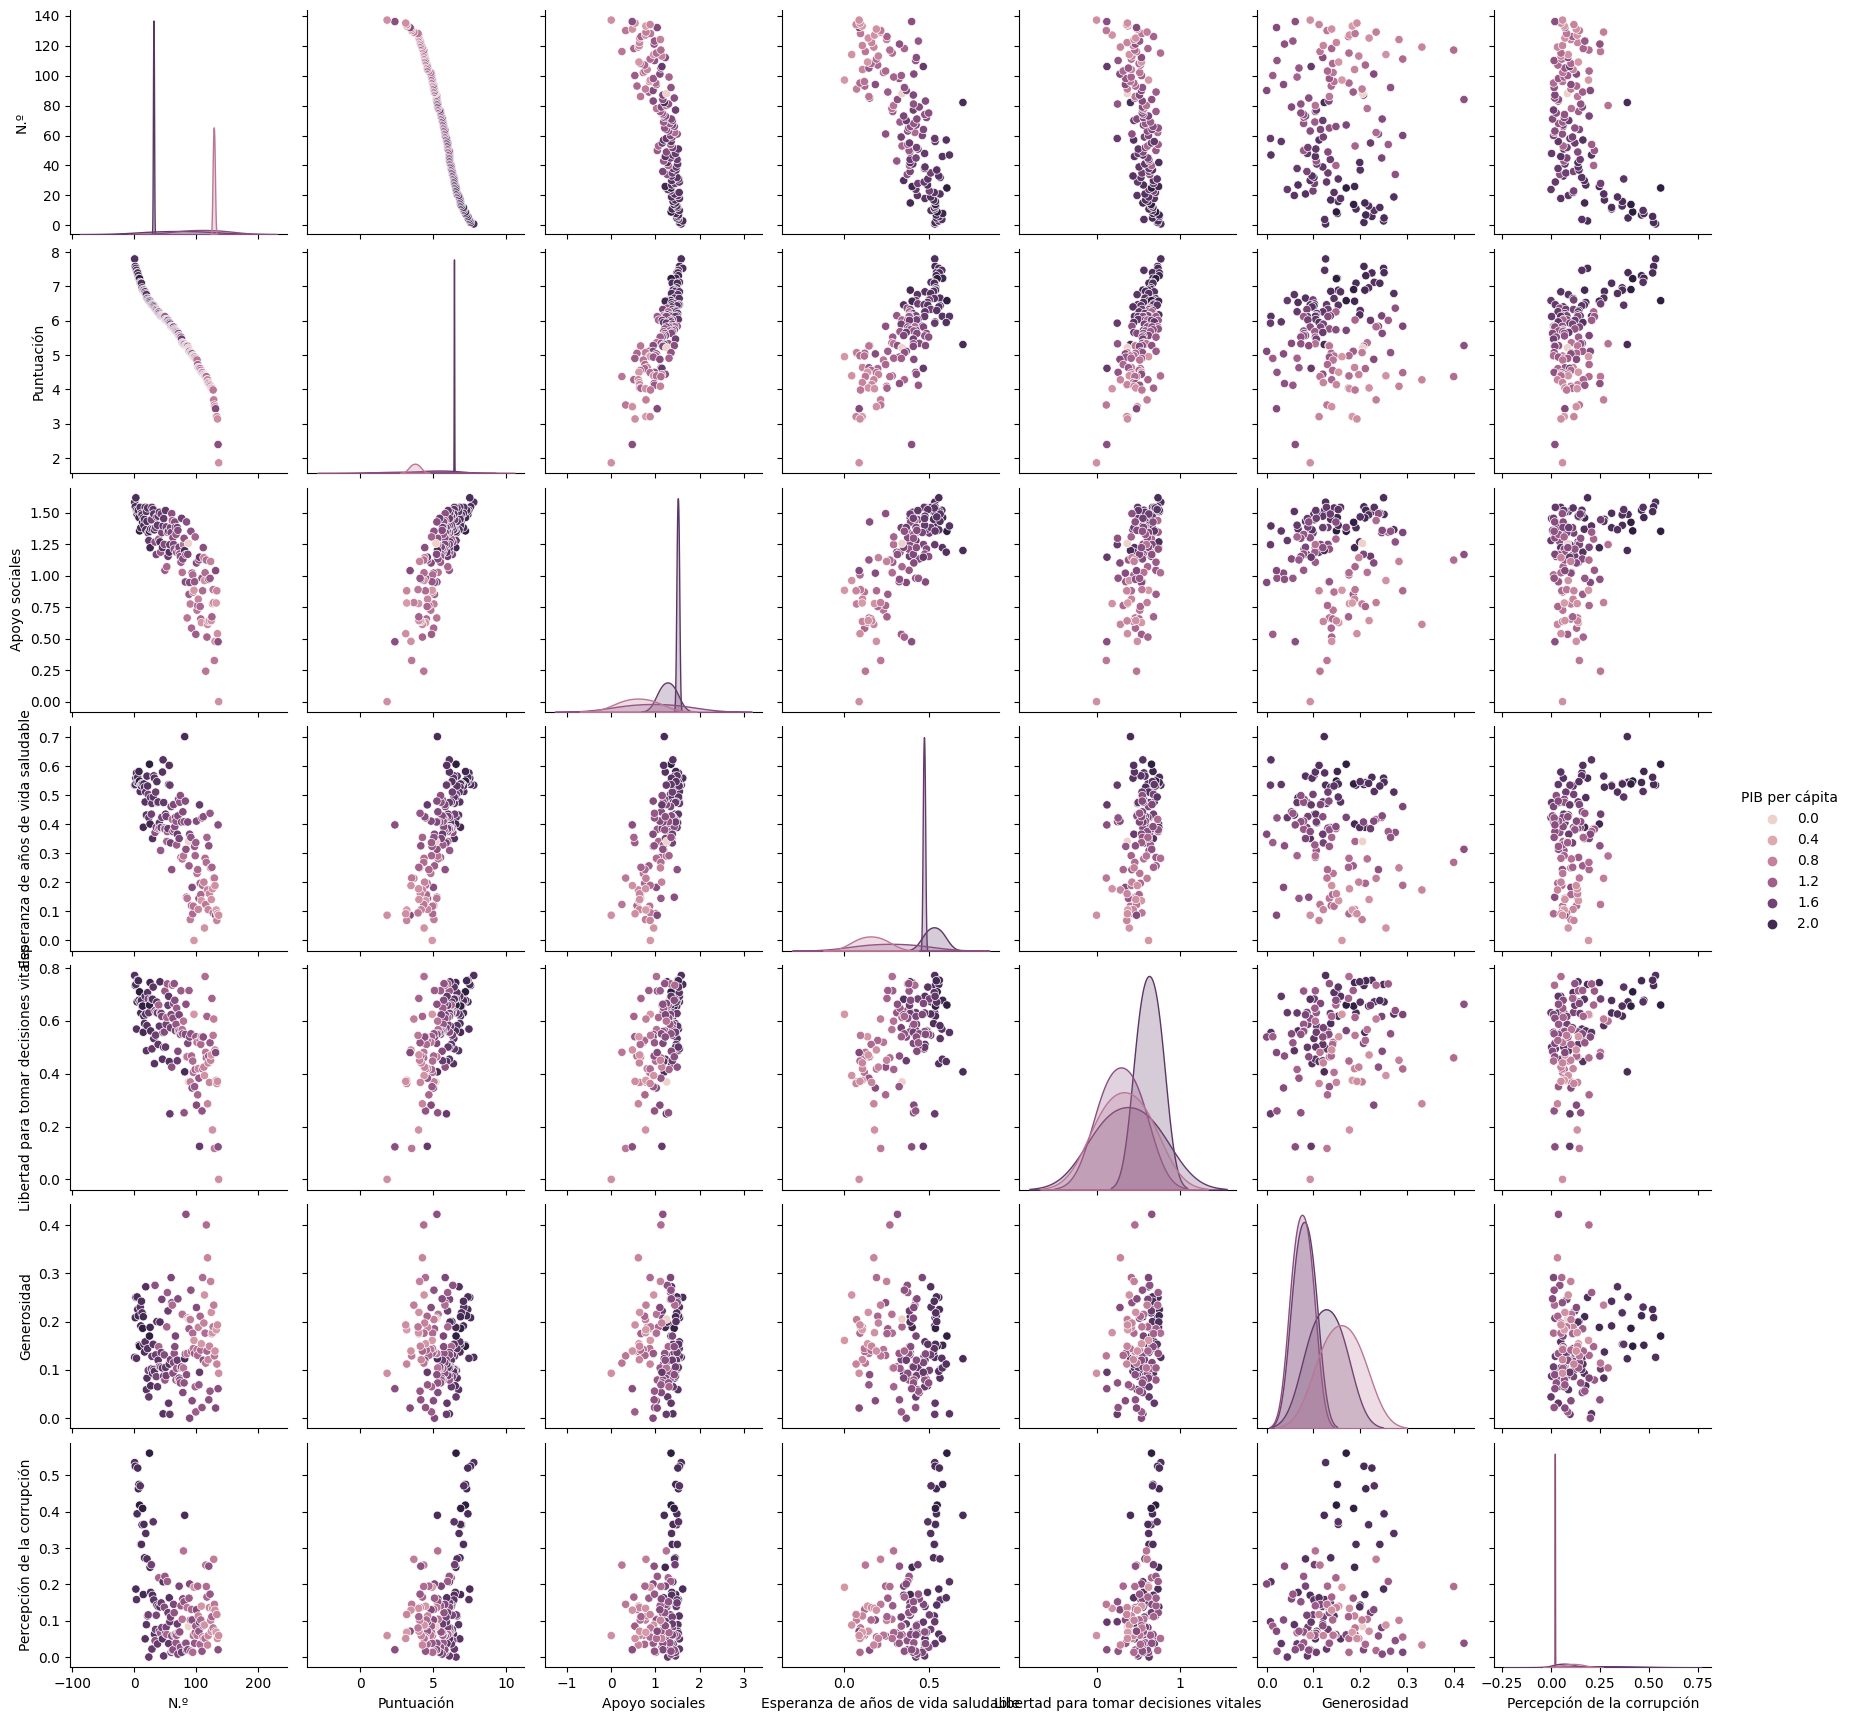

In [21]:
# Grafica de correlaciones respecto a los Estados
sns.pairplot(data,hue="PIB per cápita")

> ## Interpretación de los gráficos ?
Realizar estudiante

In [22]:
# Seleccción de variables significativas
# sel_data = data[['TJ','Pts.', 'PJ', 'PE', 'PP', 'GF', 'GC', 'Dif.', 'Títulos']]
sel_data = data[['PIB per cápita','Esperanza de años de vida saludable']]
sel_data

,PIB per cápita,Esperanza de años de vida saludable
0,1.888,0.535
1,1.949,0.537
2,1.926,0.559
3,1.833,0.577
4,1.942,0.545
...,...,...
132,0.531,0.105
133,0.758,0.069
134,0.670,0.092
135,1.417,0.398


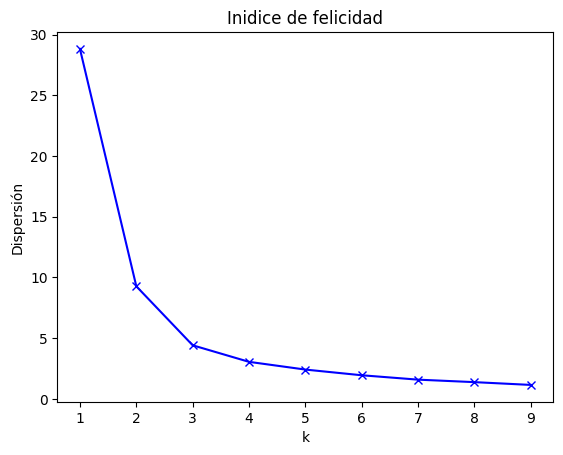

In [25]:
# Analsis de Dispersión por método de Codo
def plot_dispersion(x, figure_name, max_k = 10, n_init = 10):
    inertia = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k, n_init = n_init).fit(x)
        inertia.append(kmeans.inertia_)

    plt.plot(range(1, max_k), inertia, 'bx-')
    plt.xlabel('k')
    plt.ylabel(u'Dispersión')
    plt.title(figure_name)

plot_dispersion(sel_data, 'Inidice de felicidad')

> ## Interpretación del gráfico ?
Realizar estudiante